In [106]:
import numpy
import matplotlib.pyplot as plt
import time

#### Bukin function

In [107]:
def bukin(x: float, y: float):
    return 100 * numpy.sqrt(numpy.abs(y - 0.01 * x ** 2)) + 0.01 * numpy.abs(x + 10)

#### Function to create the starting population

In [108]:
def initialize_population(bounds, size):
    population = []
    for _ in range(size):
        individual = []
        for j in range(len(bounds)):
            individual.append(numpy.random.uniform(bounds[j][0], bounds[j][1]))
        population.append(individual)
    return population

#### Mutation operator

In [109]:
def mutation(individual, strength, probability):
    mutated_individual = []
    for i in range(len(individual)):
        if numpy.random.random() < probability:
            mutated_individual.append(individual[i] + strength * numpy.random.normal())
        else:
            mutated_individual.append(individual[i])
    return mutated_individual

#### Selection operator

In [110]:
# Elitist selection
def selection(population, size):
    sorted_population = sorted(population, key=lambda x: bukin(x[0], x[1]))
    return sorted_population[:size]

#### Crossover operator

In [111]:
# Arithmetic crossover
def crossover(parents):
    offspring = []
    for i in range(len(parents)):
        for j in range(i+1, len(parents)):
            child = []
            for k in range(len(parents[i])):
                if numpy.random.random() < 0.5:
                    child.append(parents[i][k])
                else:
                    child.append(parents[j][k])
            offspring.append(child)
    return offspring

##### The main genetic algorithm

In [112]:
def optimization(bounds, population_size, selection_size, mutation_strength, mutation_probability, max_iterations):
    population = initialize_population(bounds, population_size)
    start_time = time.time()
    fitness_history = []
    
    for _ in range(max_iterations):
        parents = selection(population, selection_size)
        offspring = crossover(parents)
        mutated_offspring = [mutation(individual, mutation_strength, mutation_probability) for individual in offspring]
        population = parents + mutated_offspring
        fitness = [bukin(individual[0], individual[1]) for individual in population]
        fitness_history.append(min(fitness))
        
    optimization_time = time.time() - start_time
    
    plt.plot(fitness_history)
    plt.title("Evolution of Fitness")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()

    best_values = min(population, key=lambda x: bukin(x[0], x[1]))
    
    return best_values[0], best_values[1], optimization_time

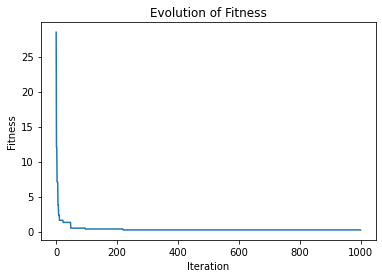

Optimization time: 0.73s
Optimal solution: x = 3.31, y = 0.109
Bukin function value = 0.23


In [113]:
x_lower_input = int(input("Lower bound for x: "))

x_upper_input = -numpy.inf
while x_upper_input <= x_lower_input:	
	x_upper_input = int(input("Upper bound for x: "))


y_lower_input = int(input("Lower bound for y: "))

y_upper_input = -numpy.inf
while y_upper_input <= y_lower_input:
	y_upper_input = int(input("Upper bound for y: "))

bounds = [(x_lower_input, x_upper_input), (y_lower_input, y_upper_input)]

population_size = 0
while population_size <= 0:
	population_size = int(input("Population size: "))

selection_size = 0
while selection_size <= 0 or selection_size > population_size:
	selection_size = int(input("Selection size: "))

mutation_strength = float(input("Mutation strength: "))

mutation_probability = -1
while mutation_probability < 0 or mutation_probability > 1:
	mutation_probability = float(input("Mutation probability: "))

max_iterations = 0
while max_iterations <= 0:
	max_iterations = int(input("Max iterations: "))

solution = optimization(bounds, population_size, selection_size, mutation_strength, mutation_probability, max_iterations)

print(f"Optimization time: {solution[2]:.2f}s")
print(f"Optimal solution: x = {solution[0]:.2f}, y = {solution[1]:.3f}")
print(f"Bukin function value = {bukin(solution[0], solution[1]):.2f}")

# Ideally x = -10, y = 1, Bukin function value = 0